# Visualizations

Import libraries: 

In [2]:
import pandas as pd
from wordcloud import WordCloud
import os
import math
import matplotlib.pyplot as plt

Load the data

In [5]:
genres_path = "C:/Users/paula/CSDS_351_Final_project/1_movies_per_genre/"
reviews_path = "C:/Users/paula/CSDS_351_Final_project/output/"

Create a list in which each element contains all the movies belonging to an specific genre

In [28]:
genres = [genre[:-4] for genre in os.listdir(genres_path) if os.path.splitext(genre)[1] == ".csv"]

data_by_genres = []

for genre in genres:

    csv = pd.read_csv(genres_path + genre + ".csv")
    titles = csv["name"]
    data_by_genres.append (pd.concat([pd.read_csv(reviews_path + str(title) + ".csv") for title in titles if os.path.exists(reviews_path + str(title) + ".csv")]))


### Scatter plot / violin plot

Star ratings vs. polarity of the reviews

C:\Users\paula\AppData\Local\Temp\ipykernel_2464\3109819053.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


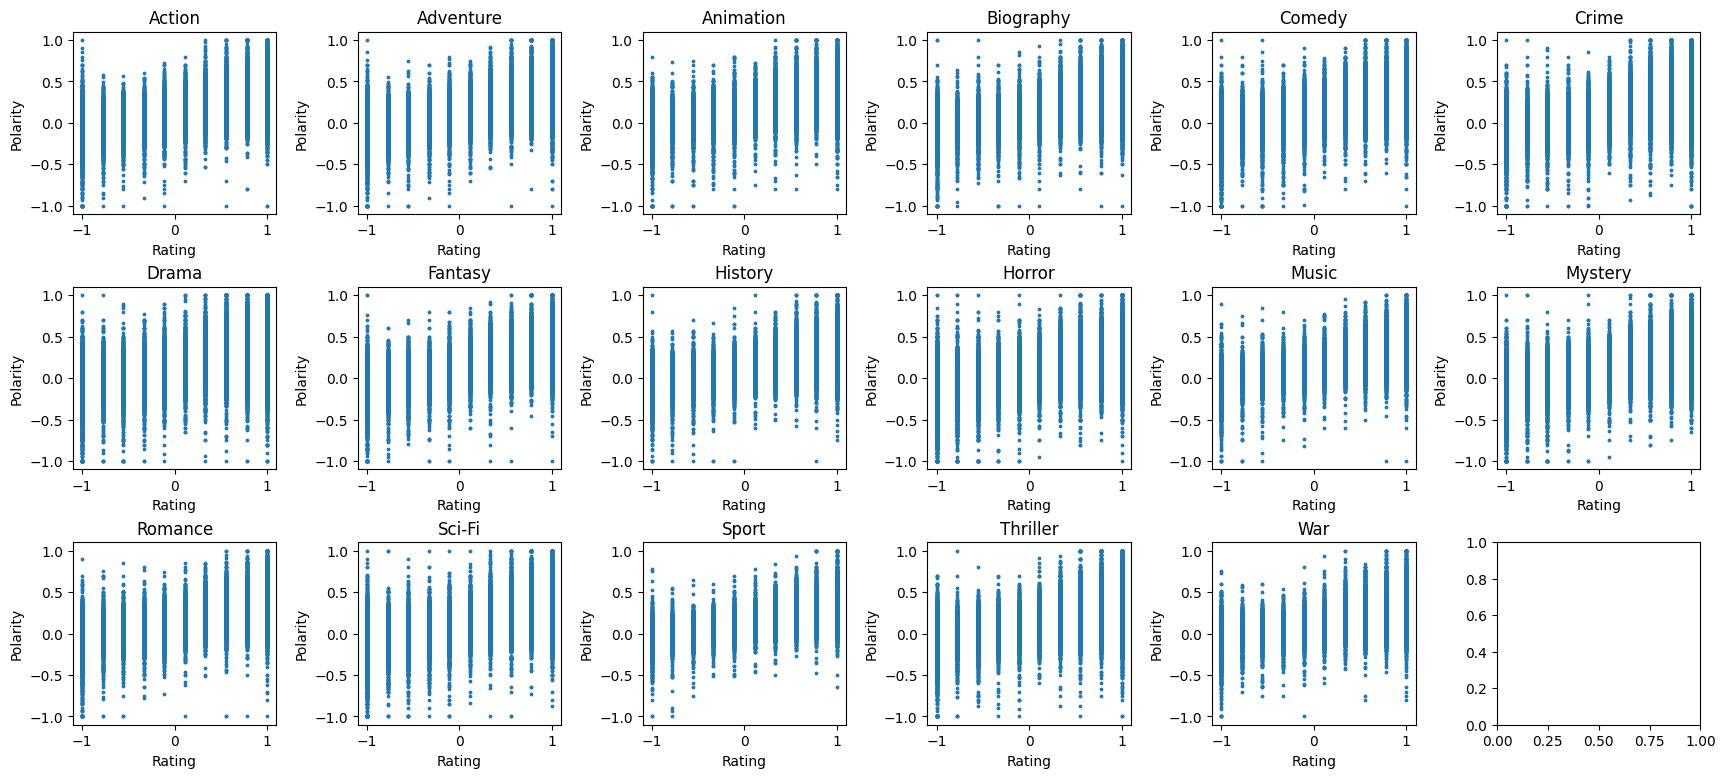

In [48]:
import pandas as pd
import os
import math
import matplotlib.pyplot as plt


plt, axs = plt.subplots (3, 6, figsize = (21, 9))

for i in range(len(genres)):
    a = math.floor(i/6)
    b = i%6
    axs[a][b].scatter(data_by_genres[i]['rating'], data_by_genres[i]['review_polarity'], s = 3)
    axs[a][b].set_xlabel('Rating')
    axs[a][b].set_ylabel('Polarity')
    axs[a][b].set_title(genres[i])

    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()

Use violin plot to appreciate densities within each rating

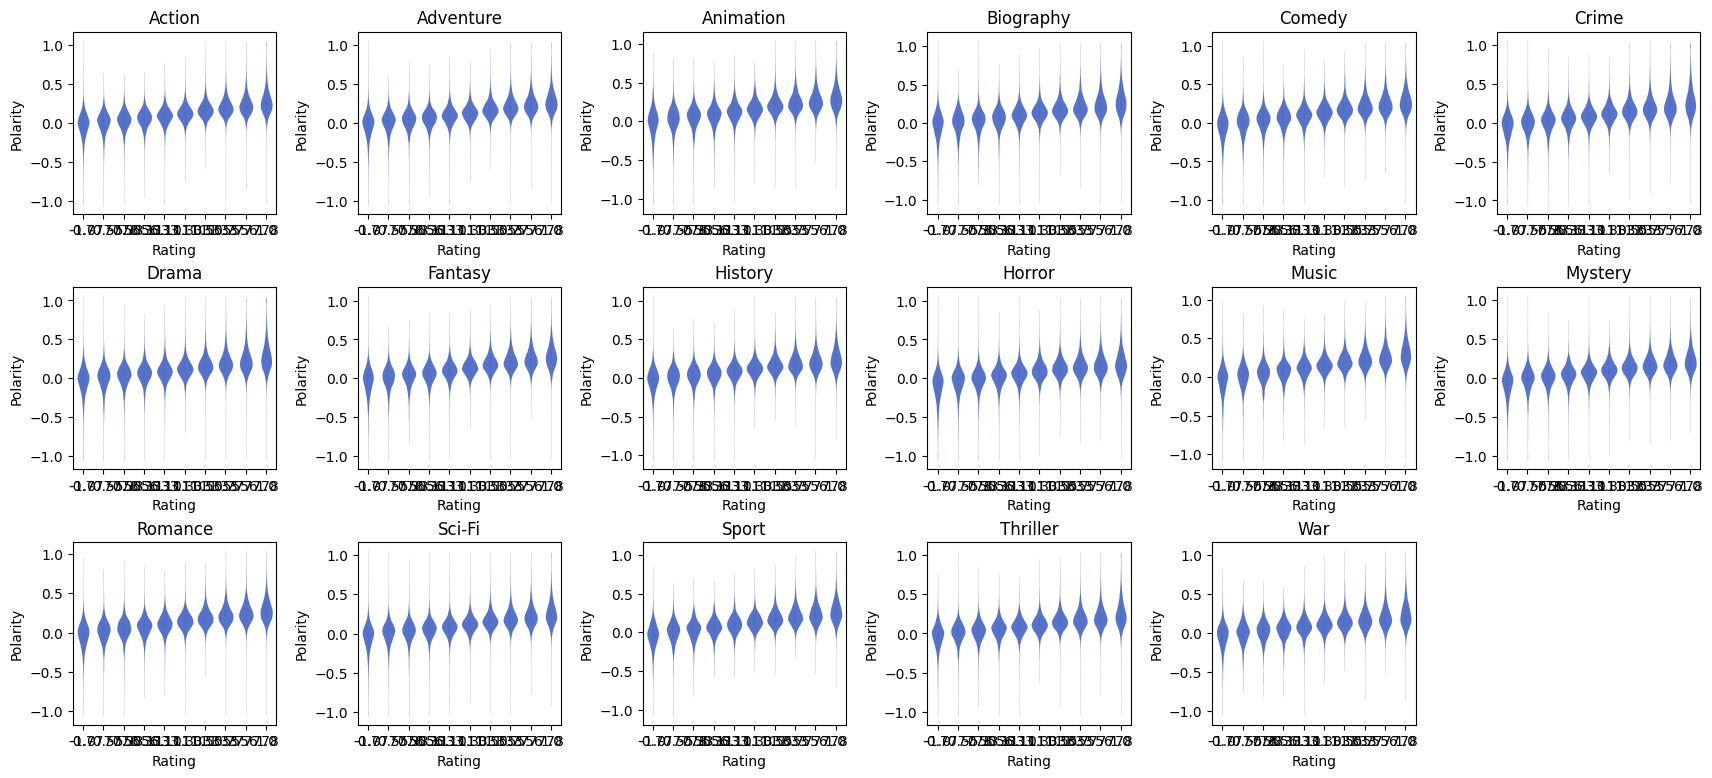

In [58]:
import seaborn as sns
import pandas as pd
# from wordcloud import WordCloud
import os
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(21, 9))

for i in range(len(genres)):
    plt.subplot(3, 6, i+1)
    sns.violinplot(data = data_by_genres[i], x = 'rating', y = 'review_polarity', color = "royalblue", linewidth = 0.05)
    plt.xlabel('Rating')
    plt.ylabel('Polarity')
    plt.title(genres[i])

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

Comparison of two different movies using a scatter plot and histograms for both the ratings and the polarities

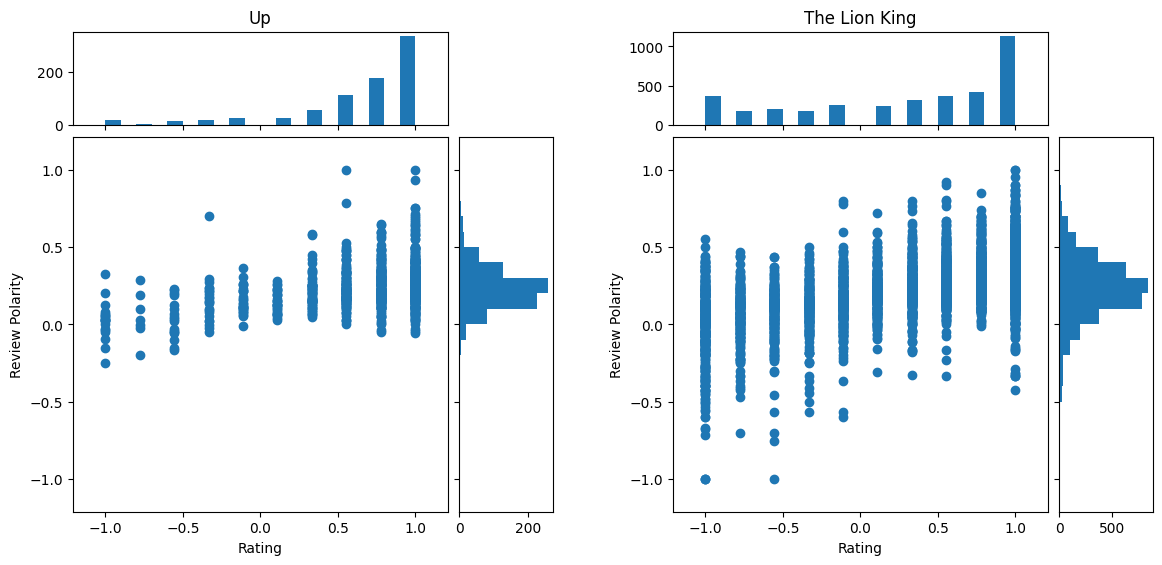

In [60]:
import numpy as np
import matplotlib.pyplot as plt

def scatter_hist(movie1, movie2 = None):

    # Load the data

    data1 = pd.read_csv(reviews_path + movie1 + ".csv")
    data2 = pd.read_csv(reviews_path + movie2 + ".csv")

    x1, x2 = data1['rating'], data2['rating']
    y1, y2 = data1['review_polarity'], data2['review_polarity']

    # First sublot

    fig = plt.figure(figsize=(12, 6))
    gs1 = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.05, right=0.45, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

    ax1 = fig.add_subplot(gs1[1, 0])
    ax_histx1 = fig.add_subplot(gs1[0, 0], sharex=ax1)
    ax_histy1 = fig.add_subplot(gs1[1, 1], sharey=ax1)

    ax_histx1.tick_params(axis="x", labelbottom=False)
    ax_histy1.tick_params(axis="y", labelleft=False)

    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Review Polarity')
    ax_histx1.set_title(movie1)

    ax1.scatter(x1, y1)

    # Limits 

    binwidth = 0.1
    xymax = max(np.max(np.abs(x1)), np.max(np.abs(y1)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx1.hist(x1, bins=bins)
    ax_histy1.hist(y1, bins=bins, orientation='horizontal')

    # Second subplot

    if movie2 is not None: 

        gs2 = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.55, right=0.95, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

        ax2 = fig.add_subplot(gs2[1, 0])
        ax_histx2 = fig.add_subplot(gs2[0, 0], sharex=ax2)
        ax_histy2 = fig.add_subplot(gs2[1, 1], sharey=ax2)

        ax_histx2.tick_params(axis="x", labelbottom=False)
        ax_histy2.tick_params(axis="y", labelleft=False)

        ax2.set_xlabel('Rating')
        ax2.set_ylabel('Review Polarity')
        ax_histx2.set_title(movie2)

        ax2.scatter(x2, y2)

        # Limits

        xymax = max(np.max(np.abs(x2)), np.max(np.abs(y2)))
        lim = (int(xymax/binwidth) + 1) * binwidth

        bins = np.arange(-lim, lim + binwidth, binwidth)
        ax_histx2.hist(x2, bins=bins)
        ax_histy2.hist(y2, bins=bins, orientation='horizontal')

    plt.show()

scatter_hist("Up", "The Lion King")


### Boxplots

Comparing the polarity per genre

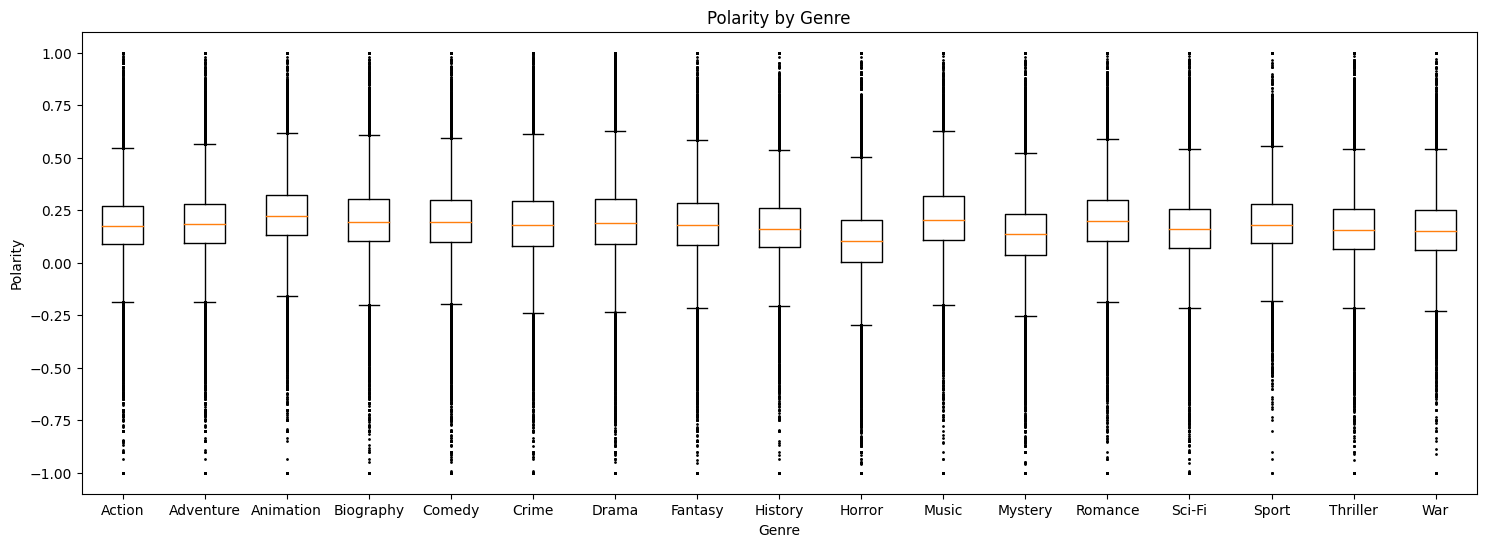

In [61]:
import pandas as pd
# from wordcloud import WordCloud
import os
import math
import matplotlib.pyplot as plt

data = [data_by_genres[i]['review_polarity'] for i in range(len(genres))]

# Plot all boxplots in one figure
plt.figure(figsize=(18, 6))
plt.boxplot(data, labels=genres, 
            flierprops=dict(marker='o', markersize=1, markerfacecolor='black', linestyle='none'))

# Set axis labels and title
plt.xlabel('Genre')
plt.ylabel('Polarity')
plt.title('Polarity by Genre')
plt.show()

## Word cloud

Load the data in a list of dictionaries. Each dictionary contains the most frequent words in the reviews of the movings belonging to a specific genre

In [29]:
import itertools

# Create a list of dictionaries (one dictionary for each genre)
# Each dictionary contains the most common words for each genre

dict_by_genres = []

for genre in genres: 

    main_dict = {}  # creo un diccionatio general

    csv = pd.read_csv(genres_path + genre + ".csv")    
    titles = csv["name"]

    for title in titles: 

        # Open the file and convert it into a dictionary

        if os.path.exists(reviews_path + title + "_polarity.txt"):
            
            aux_dict = {}
            with open(reviews_path + title + "_polarity.txt") as file:
                for line in file:
                    key, value = line.strip().split(": ")
                    aux_dict[key] = float(value)

            # Merge the diccionary for the given title with the main dictionary of the genre
            for key, value in aux_dict.items():
                main_dict[key] = main_dict.get(key, 0) + value

    # Sort words in the diccionary according to their important and select top 100

    sorted_keys = sorted(main_dict, key=lambda x: main_dict[x], reverse=True)
    main_dict = {key: main_dict[key] for key in sorted_keys}
    main_dict = dict(itertools.islice(main_dict.items(), 100))

    dict_by_genres.append (main_dict)

    



Plot word clouds for each genre

C:\Users\paula\AppData\Local\Temp\ipykernel_2464\3989118460.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


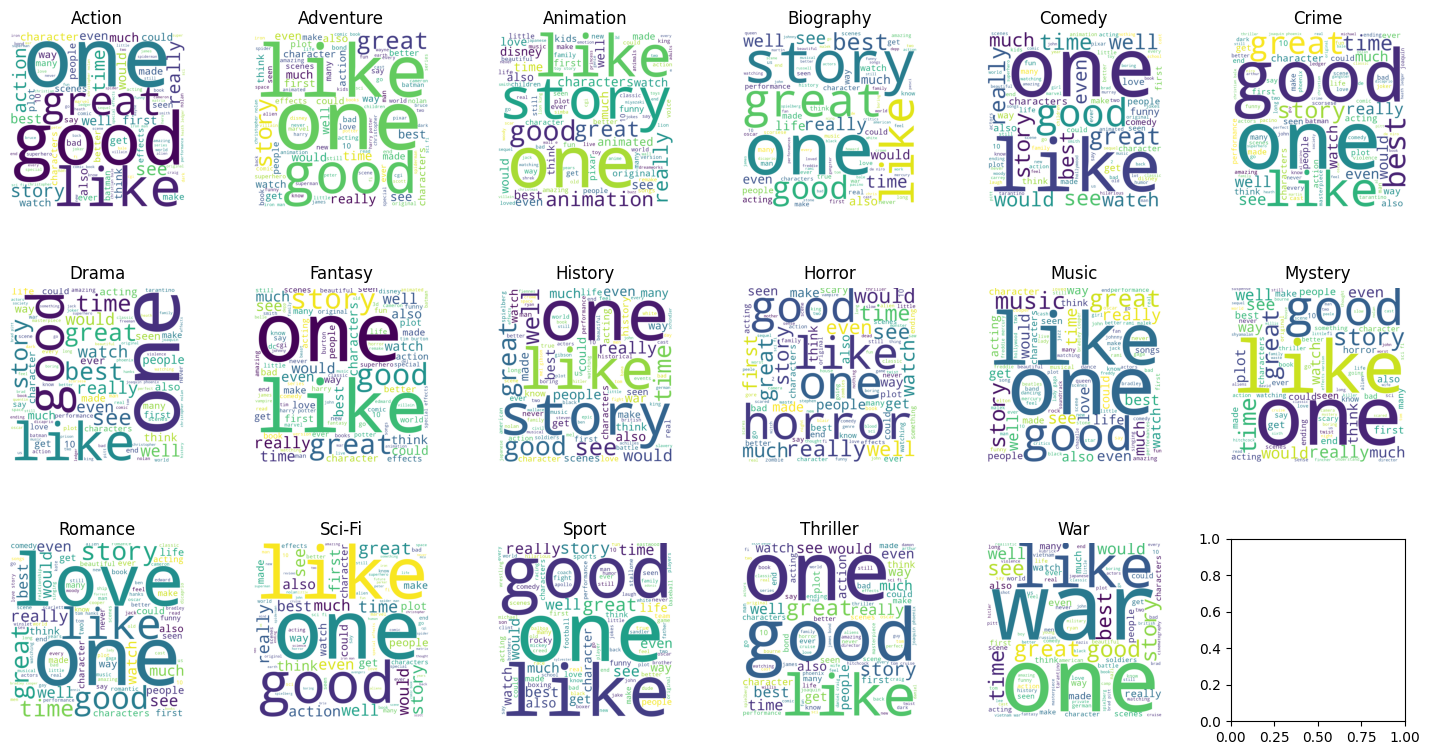

In [35]:
from wordcloud import WordCloud
import pandas as pd
import os
import math
import matplotlib.pyplot as plt

plt, axs = plt.subplots (3, 6, figsize = (18, 9))

for i in range(len(genres)):

    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(dict_by_genres[i])

    a = math.floor(i/6)
    b = i%6

    axs[a][b].imshow(wordcloud)
    axs[a][b].axis("off")
    axs[a][b].set_title(genres[i])

    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()


Remove the most common words in all the genres to gain some insight about the specific words used in each genre.

In [51]:
import itertools

# Create a list of dictionaries (one dictionary for each genre)
# Each dictionary contains the most common words for each genre

clean_dict_by_genres = []
remove = ["like", "one", "good", "story", "great", "really", "time", "best", "see", "would", "well", "even", "much", "watch", "also", "first"]

for genre in genres: 

    main_dict = {}  # creo un diccionatio general

    csv = pd.read_csv(genres_path + genre + ".csv")    
    titles = csv["name"]

    for title in titles: 

        # Open the file and convert it into a dictionary

        if os.path.exists(reviews_path + title + "_polarity.txt"):
            
            aux_dict = {}
            with open(reviews_path + title + "_polarity.txt") as file:
                for line in file:
                    key, value = line.strip().split(": ")
                    aux_dict[key] = float(value)

            # Merge the diccionary for the given title with the main dictionary of the genre
            for key, value in aux_dict.items():
                main_dict[key] = main_dict.get(key, 0) + value

    # Sort words in the diccionary according to their important, remove "one, good, ..", and select top 100

    sorted_keys = sorted(main_dict, key=lambda x: main_dict[x], reverse=True)
    main_dict = {key: main_dict[key] for key in sorted_keys}

    for key in list(main_dict.keys()):
        if key in remove:
            del main_dict[key]

    main_dict = dict(itertools.islice(main_dict.items(), 100))

    clean_dict_by_genres.append (main_dict)

C:\Users\paula\AppData\Local\Temp\ipykernel_2464\2340357965.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


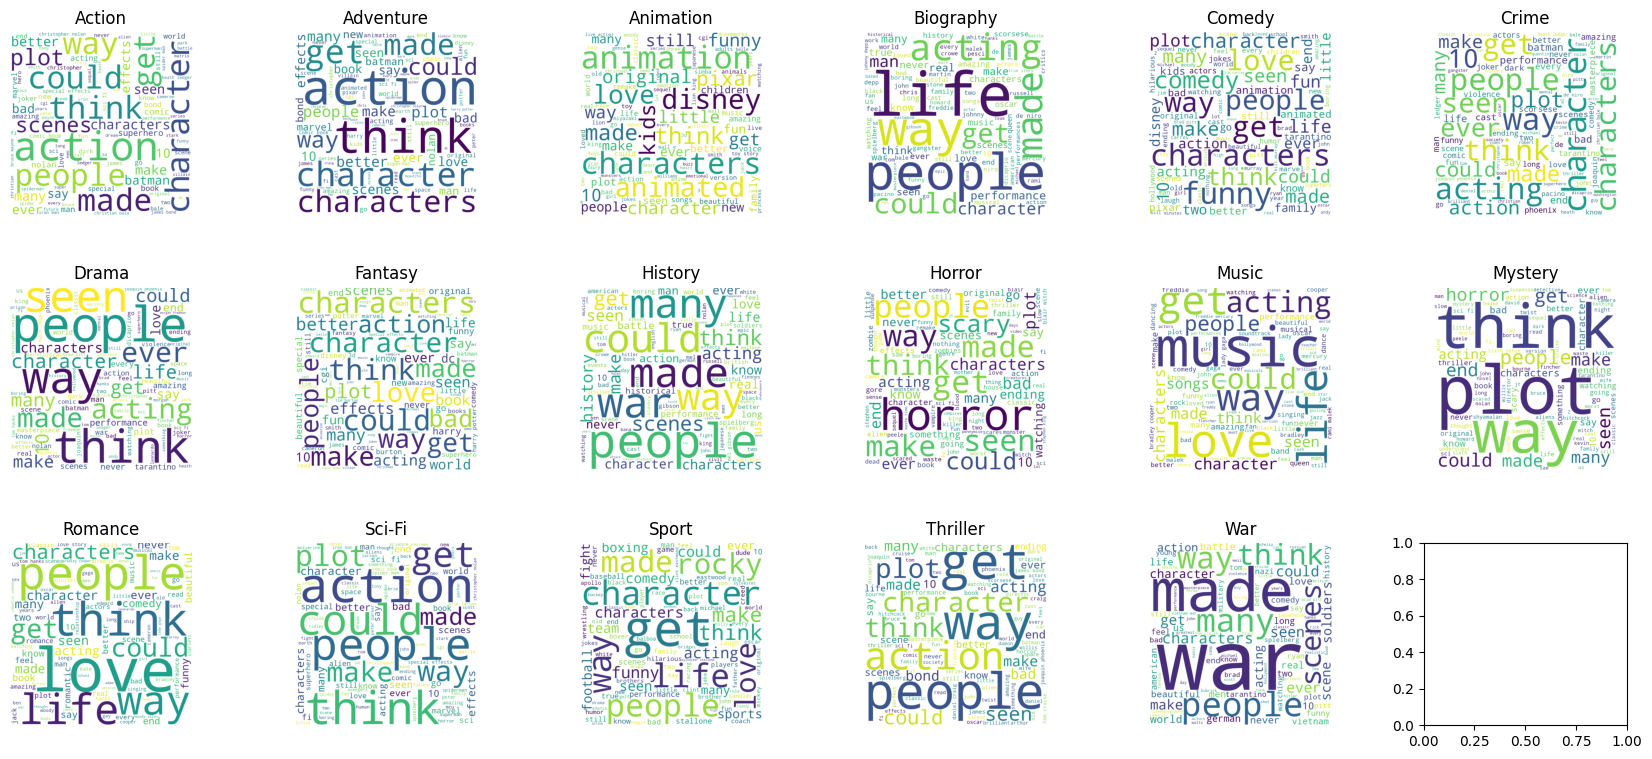

In [52]:
from wordcloud import WordCloud
import pandas as pd
import os
import math
import matplotlib.pyplot as plt

plt, axs = plt.subplots (3, 6, figsize = (21, 9))

for i in range(len(genres)):

    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(clean_dict_by_genres[i])

    a = math.floor(i/6)
    b = i%6

    axs[a][b].imshow(wordcloud)
    axs[a][b].axis("off")
    axs[a][b].set_title(genres[i])

    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()